# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key
#weather_api_key = 'dcc4902355287fcca79c61c93837a37c'


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = '/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/resources/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Assign URL variable
base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{base_url}appid={weather_api_key}&units={units}&q='


query_url

'http://api.openweathermap.org/data/2.5/weather?appid=dcc4902355287fcca79c61c93837a37c&units=imperial&q='

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

628

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
# My lists needed to make scatter plot graphs
# Make my empty lists for the data I need to display in my DF.

lat_list = []
long_list = []
temp_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
city_name_list = []
country_name_list = []
unquie_id_list = []

# Run loop for data to place in my lists

for city in cities:

    response_json = requests.get(query_url + city).json()


    try:
     lat = response_json['coord']['lat']
     lat_list.append(lat)

     long = response_json['coord']['lat']
     long_list.append(long)

     temp = response_json['main']['temp']
     temp_list.append(temp)

     humidity = response_json['main']['humidity']
     humidity_list.append(humidity)

     cloudiness = response_json['clouds']['all']
     cloudiness_list.append(cloudiness)

     wind_speed = response_json['wind']['speed']
     wind_speed_list.append(wind_speed)

    # Extra lists to make data frame easier to build
     city_name = response_json['name']
     city_name_list.append(city_name)

     country_name = response_json['sys']['country']
     country_name_list.append(country_name)

     unquie_id = response_json['id']
     unquie_id_list.append(unquie_id)
    except:
        print('This code does not work')

print(city_name_list)



This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does not work
This code does n

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [62]:
# Create a DF from all lists and display 
weather_df = pd.DataFrame({'City ID': unquie_id_list,'City': city_name_list, 'Country': country_name_list, 'Latitude': lat_list,'Longitude': long_list, 'Temperature': temp_list, 'Humidity': humidity_list,'Cloudiness': cloudiness_list, 'Wind Speed': wind_speed_list})
weather_df.head()

,City ID,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,2126199,Cherskiy,RU,68.7500,68.7500,-6.03,100,96,3.51
1,3372760,Praia da Vitória,PT,38.7333,38.7333,66.45,82,75,10.83
2,3380290,Sinnamary,GF,5.3833,5.3833,78.44,88,100,11.95
3,1507390,Dikson,RU,73.5069,73.5069,8.06,87,99,12.55
4,2122090,Pevek,RU,69.7008,69.7008,10.90,93,100,7.14


In [63]:
weather_df.to_csv('/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/weather_py/weather_df.csv', index=False,header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [64]:
# Sort values of cities that have humidity over 100%.

weather_df.sort_values(['Humidity'],ascending = False)

# There is none!

,City ID,City,Country,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,2126199,Cherskiy,RU,68.7500,68.7500,-6.03,100,96,3.51
155,5905393,Bonavista,CA,48.6499,48.6499,53.60,100,100,7.40
145,3041732,Mariehamn,AX,60.0973,60.0973,26.46,100,0,1.14
61,3416888,Grindavik,IS,63.8424,63.8424,46.87,100,90,10.36
568,3095795,Kołobrzeg,PL,54.1757,54.1757,44.46,100,70,9.19
...,...,...,...,...,...,...,...,...,...
90,5478673,Meadow Lake,US,34.8014,34.8014,70.43,16,82,16.64
421,2439155,Tanout,NE,14.9709,14.9709,85.19,16,69,10.76
286,2447513,Arlit,NE,18.7369,18.7369,85.77,14,7,9.91
463,1160939,Iranshahr,IR,27.2025,27.2025,63.57,14,0,2.51


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

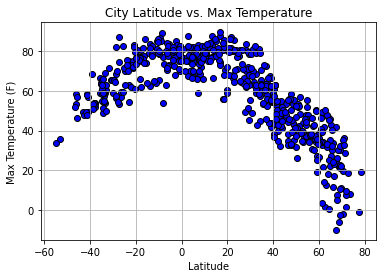

In [101]:
# Plot scatter plot
plt.scatter(weather_df['Latitude'],weather_df['Temperature'],marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/weather_py/Images/lat_temp.png')
plt.show()


### The closer to the latitude of 0, you get hotter.
### The further away from the latitude of 0, you get colder.
### The positive side (right side) of the latitiude appears to get significantly colder than the negative side.

## Latitude vs. Humidity Plot

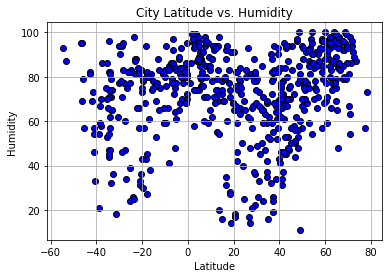

In [102]:
# Plot scatter plot
plt.scatter(weather_df['Latitude'],weather_df['Humidity'],marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/weather_py/Images/lat_humidity.png')
plt.show()

### There appears to be no real correlation in the relationship of city latitude and humidity.

## Latitude vs. Cloudiness Plot

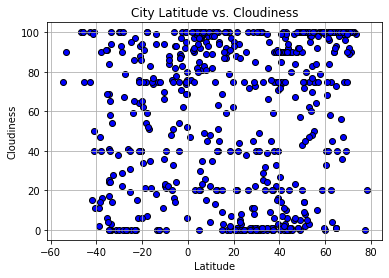

In [103]:
# Plot scatter plot
plt.scatter(weather_df['Latitude'],weather_df['Cloudiness'],marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/weather_py/Images/lat_cloudiness.png')
plt.show()


### There appears to be no real correlation in the relationship of city latitude and cloudniess. 

## Latitude vs. Wind Speed Plot

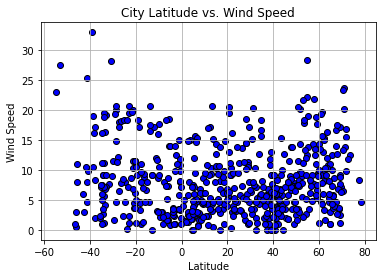

In [104]:
# Plot scatter plot
plt.scatter(weather_df['Latitude'],weather_df['Wind Speed'],marker = "o", color = "blue",edgecolor = "black")
plt.grid()
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('/Users/jacobcortez/Documents/GitHub/DS_Repos/HW_Repo/python_api_challenge/weather_py/Images/lat_wind_speed.png')
plt.show()


### The only correlation between city latitude and wind speed relationship appears to be higher wind speeds. Essentially, the further away you are from the latitude of 0, the greater the wind speeds.

## Linear Regression

In [88]:
# Add the linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

# Create north and south hemisphere DF
northern_hemisphere = weather_df.loc[weather_df["Latitude"]>0]
southern_hemisphere = weather_df.loc[weather_df["Latitude"]<0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8827060440771365


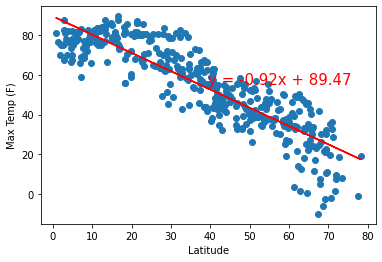

None


In [89]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Temperature"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7788133272511942


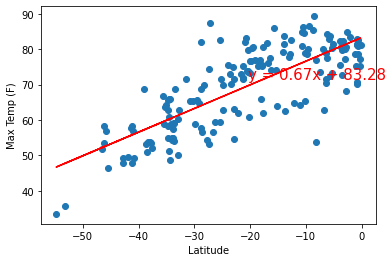

None


In [91]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Temperature"]
plt.ylabel("Max Temp (F)")
print(linear_reg_plot(x_values,y_values))

In [ ]:
# Max Temp vs Latitude Linear Regression


### Both hemispheres show the same inverse relationship between latitude and temp and again the closer you get to the equator (latitude of 0) the hotter it is. There is a strong correlation for both hemispheres, but the north hemisphere almost has a one to one relationship.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.15290274699259043


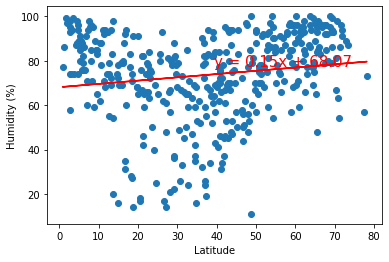

None


In [92]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.20768782103050176


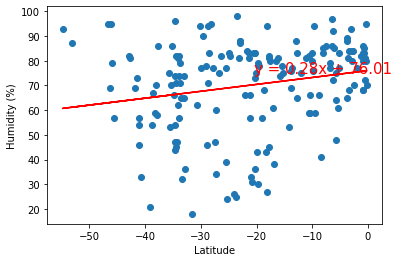

None


In [94]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Humidity"]
plt.ylabel("Humidity (%)")
print(linear_reg_plot(x_values,y_values))

In [ ]:
# Humidity  vs Latitude Linear Regression

### There is a small positive correlation in the Northern Hemisphere and a small negative correlation in the Southern Hemisphere. Im the Northern Hemisphere as you get further away from the equator (latitude of 0) humidity increases, and in the Southern Hemisphere it decreases as you get further away from the equator. Other than that, not a very strong correlation between humidity and latitude.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1366972369741801


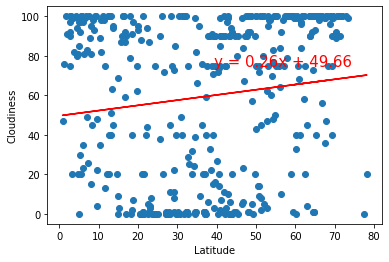

None


In [96]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14241145723446316


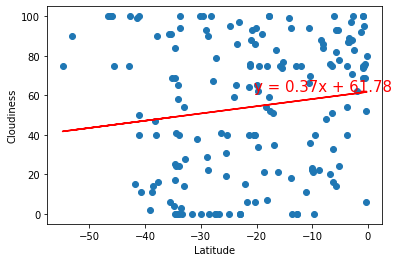

None


In [97]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
print(linear_reg_plot(x_values,y_values))


In [ ]:
# Cloudniess vs Latitude 

### Again not a strong correlation between cloudiness and latitude, however the linear regression displays a slight positive correlation in the northern hemisphere and a strong negative correlation in the southern hemisphere. Essentially, in the south hemisphere the further away you are from the equator (latitude of 0) the less cloudy it is.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.23075766941564393


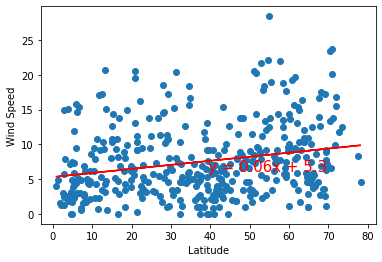

None


In [98]:
x_values = northern_hemisphere["Latitude"]
y_values = northern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.22568073795860882


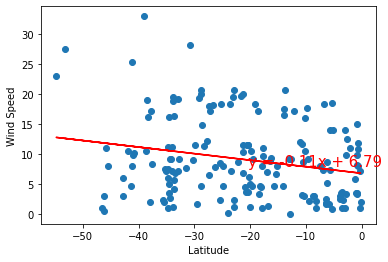

None


In [99]:
x_values = southern_hemisphere["Latitude"]
y_values = southern_hemisphere["Wind Speed"]
plt.ylabel("Wind Speed")
print(linear_reg_plot(x_values,y_values))

In [ ]:
# Wind Speed vs Latitude

### There is stong correlation between wind speed and latitude, however the linear regression shows a much lower correlation in the southern hemisphere versus the northern hemisphere. You could see this just a bit in the prior scatter plot, but it is evident more so in the linear regression graph.